In [422]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

### Average results over 3 seeds

In [423]:
def process_experiment_data(base_path, experiment_prefix):
    seeds = ["123", "213", "321"]
    data_frames = []
    
    # Loop through each seed and load the corresponding summary.csv
    for seed in seeds:
        file_path = os.path.join(base_path, f"{experiment_prefix}{seed}", "summary.csv")
        df = pd.read_csv(file_path)
        data_frames.append(df)

    
    # Combine data frames and calculate average
    if data_frames:
        combined_data = pd.concat(data_frames)
        average_data = combined_data.groupby('epoch').mean()
        return average_data
    else:
        return None  # or appropriate response like an empty DataFrame


In [424]:
base_path = "~/msc-project/atari/output/atari_1/"
experiment_types = ["dmamba_breakout", "dtrans_breakout", "dmamba_qbert", "dtrans_qbert"]  # add more as needed

experiment_results = {}

for experiment in experiment_types:
    result = process_experiment_data(base_path, experiment)
    if result is not None:
        experiment_results[experiment] = result
        # print(f"Results for {experiment}:")
        # print(result)
        # print("\n")
        # Save to csv with prefix avg_
        result.to_csv(f"avg_{experiment}.csv")
    else:
        print(f"No data processed for {experiment}")

### Plot

In [425]:
def load_experiment_data(base_path, experiment_prefix):
    seeds = ["123", "213", "321"]
    data_frames = []
    
    # Load data for each seed
    for seed in seeds:
        file_path = f"{base_path}{experiment_prefix}{seed}/summary.csv"
        df = pd.read_csv(file_path)
        df['epoch'] += 1
        data_frames.append(df)
    
    return data_frames  # return list of dataframes

In [426]:
# def plot_training_loss(base_path, experiment_types, task_name):
#     plt.figure(figsize=(5, 4))
    
#     # Define colors and styles
#     colors = {'Decision Mamba': 'red', 'Decision Transformer': 'green'}
#     styles = {'seed': {'alpha': 0.4, 'linestyle': '--'}, 'avg': {'alpha': 1.0, 'linestyle': '-'}}
    
#     for experiment in experiment_types:
#         data_frames = load_experiment_data(base_path, experiment)
#         model_name = "Decision Mamba" if "dmamba" in experiment else "Decision Transformer"
        
#         if data_frames:
#             # Plot each seed's training loss
#             for df in data_frames:
#                 plt.plot(df['epoch'], df['training/train_loss_mean'], color=colors[model_name], **styles['seed'])
            
#             # Calculate and plot the average training loss
#             combined_data = pd.concat(data_frames)
#             average_data = combined_data.groupby('epoch').mean()
#             plt.plot(average_data.index, average_data['training/train_loss_mean'], label=f'{model_name}', color=colors[model_name], **styles['avg'])
    
#     # plt.title(f"Training Loss Over Epochs for {task_name}")
#     plt.xlabel("Epoch")
#     plt.ylabel("Training Loss")
#     plt.xticks(range(1, 6))  # Set x-axis ticks to show epochs from 1 to 5
#     plt.legend()
#     plt.show()



# base_path = "~/msc-project/atari/output/atari_1/"
# experiment_types = ["dmamba_breakout", "dtrans_breakout"]  # focusing on breakout
# plot_training_loss(base_path, experiment_types, "Breakout")

# base_path = "~/msc-project/atari/output/atari_1/"
# experiment_types = ["dmamba_qbert", "dtrans_qbert"]  # focusing on breakout
# plot_training_loss(base_path, experiment_types, "Qbert")

In [427]:
def plot_metric_over_epochs(base_path, experiment_types, task_name, metric):
    plt.figure(figsize=(5, 4))
    
    # Define colors and styles
    colors = {'Decision Mamba': 'orange', 'Decision Transformer': 'green'}
    styles = {'seed': {'alpha': 0.4, 'linestyle': '--'}, 'avg': {'alpha': 1.0, 'linestyle': '-'}}
    
    for experiment in experiment_types:
        data_frames = load_experiment_data(base_path, experiment)
        model_name = "Decision Mamba" if "dmamba" in experiment else "Decision Transformer"
        
        if data_frames:
            # Plot each seed's metric
            for df in data_frames:
                plt.plot(df['epoch'], df[metric], color=colors[model_name], **styles['seed'])
            
            # Calculate and plot the average metric
            combined_data = pd.concat(data_frames)
            average_data = combined_data.groupby('epoch').mean()
            plt.plot(average_data.index, average_data[metric], label=f'{model_name}', color=colors[model_name], **styles['avg'])
    
    plt.title(f"{task_name}")
    plt.xlabel("Epoch")
    plt.ylabel(metric.replace('/', ' ').title())
    plt.xticks(range(1, 6))  # Set x-axis ticks to show epochs from 1 to 5
    plt.legend()
    plt.show()


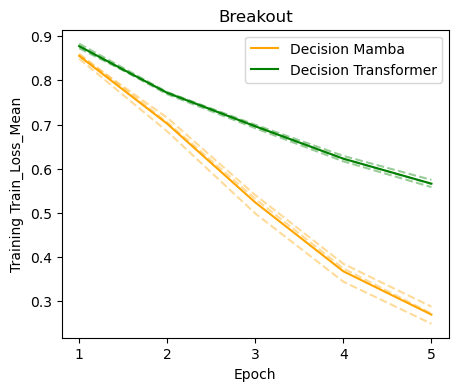

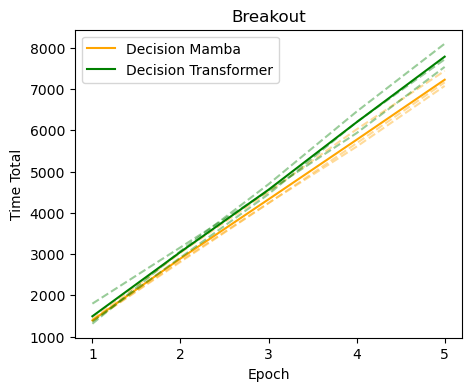

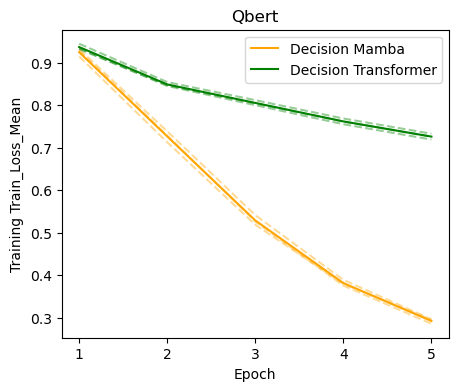

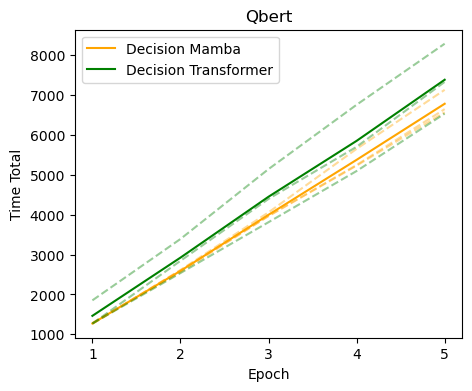

In [428]:
base_path = "~/msc-project/atari/output/atari_1/"
experiment_types = ["dmamba_breakout", "dtrans_breakout"]  
metric = "training/train_loss_mean"  # change this to other metrics if needed
plot_metric_over_epochs(base_path, experiment_types, "Breakout", metric)

base_path = "~/msc-project/atari/output/atari_1/"
experiment_types = ["dmamba_breakout", "dtrans_breakout"] 
metric = "time/total" 
plot_metric_over_epochs(base_path, experiment_types, "Breakout", metric)



base_path = "~/msc-project/atari/output/atari_1/"
experiment_types = ["dmamba_qbert", "dtrans_qbert"]  
metric = "training/train_loss_mean"  
plot_metric_over_epochs(base_path, experiment_types, "Qbert", metric)

base_path = "~/msc-project/atari/output/atari_1/"
experiment_types = ["dmamba_qbert", "dtrans_qbert"] 
metric = "time/total" 
plot_metric_over_epochs(base_path, experiment_types, "Qbert", metric)

### Normalized score

In [429]:
import pandas as pd

def calculate_normalized_score(raw_scores, score_random, score_expert):
    return 100 * (raw_scores - score_random) / (score_expert - score_random)

def process_experiment_results(base_path, experiment_prefix, game):
    seeds = ["123", "213", "321"]
    normalized_scores = []

    # Game specific random and expert scores
    score_random = {
        'Breakout': 1.7, 'Qbert': 163.9, 'Pong': -20.7, 'Seaquest': 68.4
    }
    score_expert = {
        'Breakout': 30.5, 'Qbert': 13455.0, 'Pong': 14.6, 'Seaquest': 42054.7
    }

    for seed in seeds:
        file_path = f"{base_path}{experiment_prefix}{seed}/summary.csv"
        if pd.read_csv(file_path).empty:
            print(f"Warning: No data in {file_path}")
            continue

        # Load last epoch data
        last_epoch_data = pd.read_csv(file_path).iloc[-1]
        raw_score = last_epoch_data['evaluation/eval_return']

        # Calculate normalized score
        normalized_score = calculate_normalized_score(raw_score, score_random[game], score_expert[game])
        normalized_scores.append(normalized_score)

    if normalized_scores:
        return pd.Series(normalized_scores).agg(['mean', 'std'])
    else:
        return None


In [430]:
base_path = "~/msc-project/atari/output/atari_1/"

experiment_prefix = "dmamba_breakout"
game = "Breakout"
results = process_experiment_results(base_path, experiment_prefix, game)
results = results.round(2) # Round to 2 decimal places
print(f"Game: {game} \nModel: {experiment_prefix}")
print(results)
print()

experiment_prefix = "dtrans_breakout"
game = "Breakout"
results = process_experiment_results(base_path, experiment_prefix, game)
results = results.round(2) # Round to 2 decimal places
print(f"Game: {game} \nModel: {experiment_prefix}")
print(results)
print()

experiment_prefix = "dmamba_qbert"
game = "Qbert"
results = process_experiment_results(base_path, experiment_prefix, game)
results = results.round(2) # Round to 2 decimal places
print(f"Game: {game} \nModel: {experiment_prefix}")
print(results)
print()

experiment_prefix = "dtrans_qbert"
game = "Qbert"
results = process_experiment_results(base_path, experiment_prefix, game)
results = results.round(2) # Round to 2 decimal places
print(f"Game: {game} \nModel: {experiment_prefix}")
print(results)
print()


Game: Breakout 
Model: dmamba_breakout
mean    175.81
std      36.96
dtype: float64

Game: Breakout 
Model: dtrans_breakout
mean    195.25
std      36.98
dtype: float64

Game: Qbert 
Model: dmamba_qbert
mean    17.21
std     13.38
dtype: float64

Game: Qbert 
Model: dtrans_qbert
mean    3.85
std     2.06
dtype: float64

